In [1]:
import pandas as pd
import geopandas as gp
import maup

# Aggregating Data to Different Geographies Using maup

This code walks you through how to aggregate data using the [maup software package](https://github.com/mggg/maup), which might be needed to create a similar dataset to that mentioned in this [Case Study](https://redistrictingdatahub.org/tools/support/helping-civil-rights-organizations-create-a-dataset-for-rpv-analysis/).

## Files to Download

- CT blocks: https://redistrictingdatahub.org/dataset/connecticut-block-pl-94171-2020/
- CT 2020 election results at the precinct level: https://redistrictingdatahub.org/dataset/vest-2020-connecticut-precinct-and-election-results/

## Loading Files

In [2]:
# Download CT census-block data (.shp format)
ct_blocks = gp.read_file("./raw-from-source/ct_pl2020_b/ct_pl2020_b.shp")

# Download CT election result data at the precinct-level (.shp format)
ct_precincts = gp.read_file("./raw-from-source/ct_vest_20/ct_vest_20.shp")

# Modify the CT precinct crs to match that of the blocks
ct_precincts = ct_precincts.to_crs(ct_blocks.crs)

## Our Goal: Aggregate Block Data to the Precinct-Level

Note: From taking a look at the data in the precinct file and block file, it doesn't look like there is information about which census blocks are contained within which precinct, so we'll need to use the block geometries to look for overlaps with the precinct geometries to know how the block data should be aggregated

In [3]:
print(ct_precincts.head())

  STATEFP20 COUNTYFP20              NAME20  G20PREDBID  G20PRERTRU  \
0        09        011    Montville 004-00        1486        1547   
1        09        005  Barkhamsted 001-00        1154        1228   
2        09        005    Bethlehem 001-00         937        1393   
3        09        005  Bridgewater 001-00         667         549   
4        09        005       Canaan 001-00         437         209   

   G20PRELJOR  G20PREGHAW  G20PREOWRI  \
0          67          10           0   
1          42          16           2   
2          21          15           1   
3          10           7           0   
4           6           2           1   

                                            geometry  
0  POLYGON ((-72.22762 41.51870, -72.22757 41.518...  
1  POLYGON ((-73.05268 41.89076, -73.05217 41.892...  
2  POLYGON ((-73.26145 41.66464, -73.25791 41.664...  
3  POLYGON ((-73.40474 41.53702, -73.40457 41.537...  
4  POLYGON ((-73.37304 41.96030, -73.37296 41.960...  


In [4]:
print(ct_blocks.head())

  STATEFP20 COUNTYFP20 TRACTCE20 BLOCKCE20          GEOID20      NAME20  \
0        09        011    693600      2019  090116936002019  Block 2019   
1        09        011    702400      1008  090117024001008  Block 1008   
2        09        011    705400      3006  090117054003006  Block 3006   
3        09        011    870704      2013  090118707042013  Block 2013   
4        09        011    693300      2017  090116933002017  Block 2017   

  MTFCC20 FUNCSTAT20  ALAND20  AWATER20  ... P0050002 P0050003 P0050004  \
0   G5040          S   341909         0  ...        0        0        0   
1   G5040          S   321762         0  ...        0        0        0   
2   G5040          S        0     34066  ...        0        0        0   
3   G5040          S    21816         0  ...        0        0        0   
4   G5040          S  2012295         0  ...        0        0        0   

  P0050005 P0050006 P0050007 P0050008 P0050009 P0050010  \
0        0        0        0        0  

## Using maup

maup is a tool developed by mggg that can help with this aggregation. In maup you input both a source and a target geometry, in this case, our source geometry is the census block file and our target geometry is the precinct file, as we are hoping to aggregate from the census blocks to the precinct level.

maup works by iterating over the source geometries and calculating the target geometry that contains the largest part of the source geometries' area. This is the target geometry that the source is assigned to for aggregation.

**For this example, we will be focused on maup's assign function, although maup does have other functions.**

In [5]:
# We would like to assign CT blocks to CT precincts, so we first list the CT blocks file
# as the source geometry, followed by the precincts file as the target geometry.
assignment = maup.assign(ct_blocks, ct_precincts)

/Users/peterhorton/opt/anaconda3/envs/maup_new/lib/python3.9/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/peterhorton/opt/anaconda3/envs/maup_new/lib/python3.9/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed com

/Users/peterhorton/opt/anaconda3/envs/maup_new/lib/python3.9/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/peterhorton/opt/anaconda3/envs/maup_new/lib/python3.9/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed com

/Users/peterhorton/opt/anaconda3/envs/maup_new/lib/python3.9/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/peterhorton/opt/anaconda3/envs/maup_new/lib/python3.9/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed com

/Users/peterhorton/opt/anaconda3/envs/maup_new/lib/python3.9/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/peterhorton/opt/anaconda3/envs/maup_new/lib/python3.9/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed com

/Users/peterhorton/opt/anaconda3/envs/maup_new/lib/python3.9/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/peterhorton/opt/anaconda3/envs/maup_new/lib/python3.9/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed com

/Users/peterhorton/opt/anaconda3/envs/maup_new/lib/python3.9/site-packages/maup/intersections.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geometries = geometries[geometries.area > area_cutoff]
/Users/peterhorton/opt/anaconda3/envs/maup_new/lib/python3.9/site-packages/maup/assign.py:26: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return assign_to_max(intersections(sources, targets, area_cutoff=0).area)


## maup's output

As shown below, maup outputs a series, with an index and a corresponding value. The index of the series refers to the index values of the source geometry (CT blocks), and the values of the series refer to the indices of the target geometry (CT precincts).

Thus, the series below is an assignment file, mapping from the block to the precinct, in the same order.

In [6]:
# Take a look at the output
print(assignment)
print(assignment.shape)

0         32
1         41
2        680
3         38
4        574
        ... 
49921    624
49922    152
49923    132
49924    568
49925    128
Length: 49926, dtype: int64
(49926,)


In [7]:
# As you can see, there are 49926 census blocks in CT and 49926 values in the series above.
print(ct_blocks.shape)

(49926, 385)


## Using maup's output

In [8]:
# Add the assignment series as a column to the block data, which we can do by appending
# rather than by merging a shared variable, because they are in the same order.
ct_blocks["precinct_assignment"] = assignment



In [9]:
# Now, for every block, we have a value indicating to which index in the precinct file it should be aggregated
ct_blocks[["GEOID20", "precinct_assignment"]]

,GEOID20,precinct_assignment
0,090116936002019,32
1,090117024001008,41
2,090117054003006,680
3,090118707042013,38
4,090116933002017,574
...,...,...
49921,090034661021014,624
49922,090034761003022,152
49923,090034871004020,132
49924,090034871002006,568


In [10]:
# Dissolve the file using this assignment.
# Since we want to sum the demographic data, we add that as the aggregation function.
ct_blocks_precinct = ct_blocks.dissolve("precinct_assignment", aggfunc = "sum")

# Reset the index of the aggregated function.
ct_blocks_precinct.reset_index(inplace = True, drop = False)

In [11]:
print(ct_blocks.dtypes)
print(" ")
print(ct_blocks_precinct.dtypes)

STATEFP20                object
COUNTYFP20               object
TRACTCE20                object
BLOCKCE20                object
GEOID20                  object
                         ...   
P0050008                  int64
P0050009                  int64
P0050010                  int64
geometry               geometry
precinct_assignment       int64
Length: 386, dtype: object
 
precinct_assignment       int64
geometry               geometry
ALAND20                   int64
AWATER20                  int64
AREALAND                  int64
                         ...   
P0050006                  int64
P0050007                  int64
P0050008                  int64
P0050009                  int64
P0050010                  int64
Length: 309, dtype: object


**Make sure that the data you are aggregating makes sense. The dissolve and aggregate function used above will automatically filter out non-numeric data, as it doesn't make sense to "add" the GEOIDs of the blocks together, but some columns with numeric data (like a year of creation) may not make sense to sum.**

In [12]:
# Take a look: we have population data aggregated to the precinct level!
print(ct_blocks_precinct[["precinct_assignment", "P0010001"]])

     precinct_assignment  P0010001
0                      0      6089
1                      1      3647
2                      2      3385
3                      3      1662
4                      4      1080
..                   ...       ...
734                  736      8128
735                  737      2336
736                  738      6867
737                  739      3083
738                  740      4088

[739 rows x 2 columns]


## Checking maup's output

It is generally good practice to check your outputs with maup. By this we mean checking to see how closely what we are calling "precinct 1" aggregated out of census blocks matches the real "precinct 1."

<AxesSubplot:>

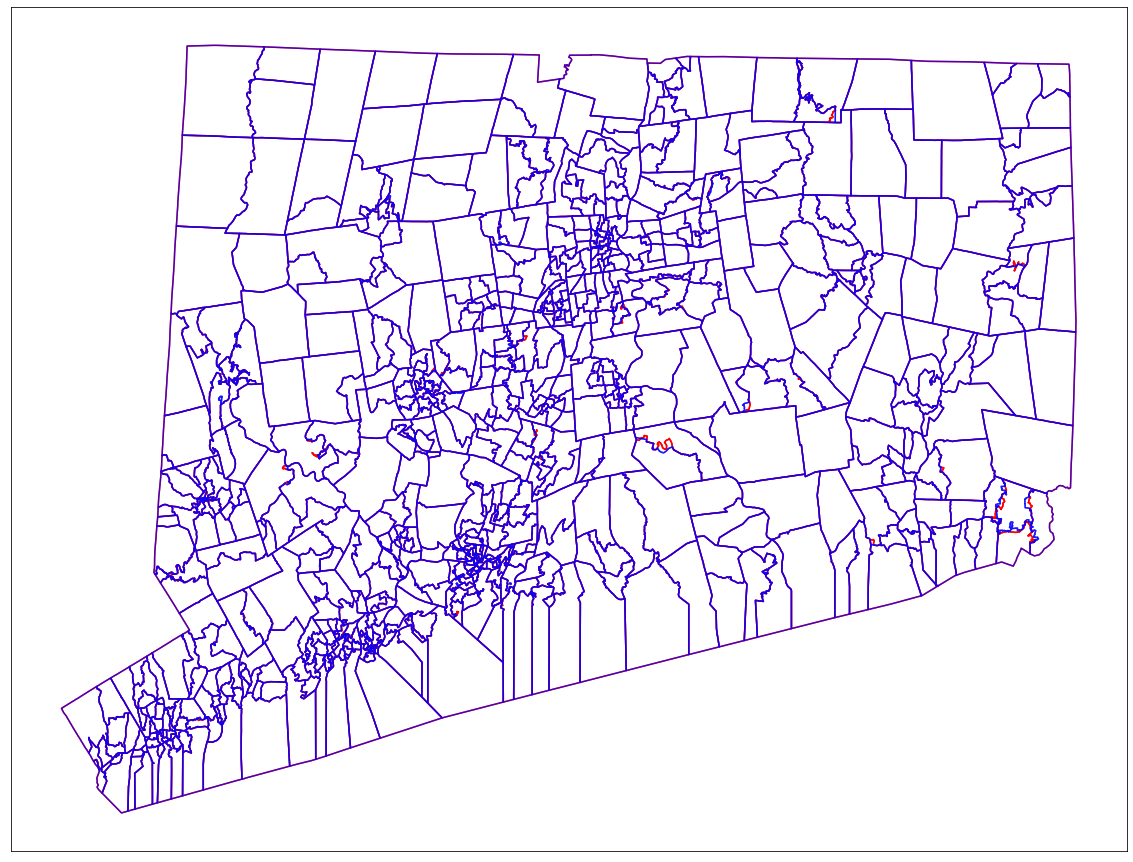

In [13]:
# Create a map of CT with real precincts in blue,
# and precincts aggregated out of census blocks in red.
ax = ct_blocks_precinct.boundary.plot(figsize = (20,20), color = "red")

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ct_precincts.boundary.plot(ax = ax, color = "blue", alpha = .7)

## Joining to the Precinct-Level Election Data

In [14]:
# Create a dictionary to map from the precinct ID to the precinct name.
# Add this to the other df and use this column for the join.
ct_precincts_id_dict = dict(zip(ct_precincts.index, ct_precincts["NAME20"]))

In [15]:
# Add the precinct name to the block-aggregated precinct dataset.
ct_blocks_precinct["NAME20"] = ct_blocks_precinct["precinct_assignment"].map(ct_precincts_id_dict).fillna("N/A")

In [16]:
# Join the two datasets.
comb_data = pd.merge(ct_blocks_precinct, ct_precincts, how = "outer", on = "NAME20", indicator = True)

In [17]:
# Check whether everything joined.
comb_data["_merge"].value_counts()

# It looks like two precincts weren't joined (see below for more info)

both          739
right_only      2
left_only       0
Name: _merge, dtype: int64

In [18]:
print(comb_data[comb_data["_merge"]!="both"]["NAME20"])

739    East Haven 001-03
740    East Haven 005-03
Name: NAME20, dtype: object


## Exporting your data

If you wanted to export your data, you could run code similar to the below.

If you would like to import 'comb_data' as a shapefile, you'll need to cast it to a dataframe and choose which of the two precinct geography columns you'd like to use as remember, they are not exactly the same!

In [19]:
## Export your data as a csv or shapefile
# import os
# os.mkdir("./ct_blocks_agg_precinct")
# ct_blocks_precinct.to_file("./ct_blocks_agg_precinct/ct_blocks_agg_precinct.shp")
# ct_blocks_precinct.drop(["geometry"],axis = 1).to_csv("./ct_blocks_agg_precinct.csv")

# Issues and Thoughts on Using maup

## Missing target geometries

As you can see from the above, no census blocks were mapped to 'East Haven 001-03' or 'East Haven 005-03'. This is either because no blocks covered this area (which is unlikely) or because no block(s) had the majority of their area in those precincts.

This can happen depending on the geometries of the geography you're aggregating from, or if the precincts are very small.

In this case, when a block is in part of two precincts, it will be assigned to the block that contains the largest amount of its area.

**There is no "one size fits all" solution of what to do in these cases; the best choice depends on the data. You could combine missing target geometries with adjacent geometries if they have meaningful data, or exclude them entirely from your data if they do not.**

<AxesSubplot:>

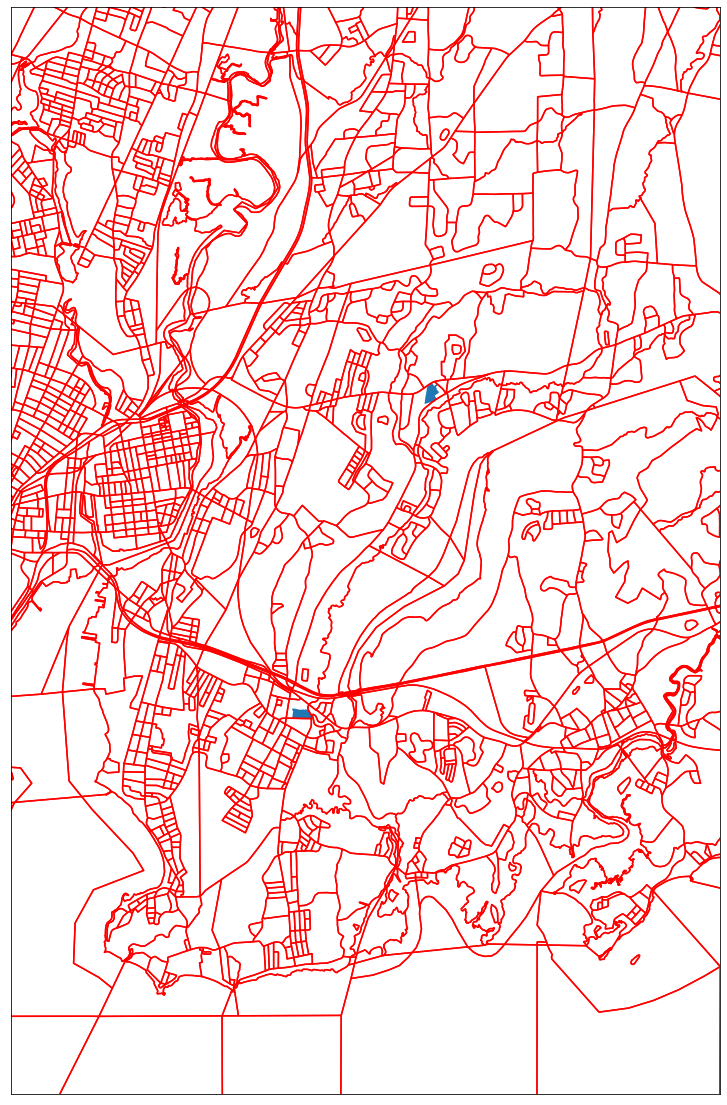

In [23]:
unassigned_precs = ct_precincts[ct_precincts["NAME20"].isin(['East Haven 001-03','East Haven 005-03'])]

ax = unassigned_precs.plot(figsize = (20,20))

xlim = ([unassigned_precs.total_bounds[0]-.05, unassigned_precs.total_bounds[2]+.05])
ylim = ([unassigned_precs.total_bounds[1]-.05, unassigned_precs.total_bounds[3]+.05])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

ct_blocks.boundary.plot(ax = ax, color = "red")

## Modifying indices

Because maup uses the index to map, and indices in python dataframes are usually just a sequence of numbers, you can change the index to make maup's output more helpful (though it will still be the same).

In [24]:
ct_blocks.index = ct_blocks["GEOID20"]
ct_precincts_mod = ct_precincts.copy(deep = True)
ct_precincts_mod.index = ct_precincts_mod["NAME20"]

In [25]:
assignment_2 = maup.assign(ct_blocks, ct_precincts_mod)

/Users/peterhorton/opt/anaconda3/envs/maup_new/lib/python3.9/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/peterhorton/opt/anaconda3/envs/maup_new/lib/python3.9/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed com

/Users/peterhorton/opt/anaconda3/envs/maup_new/lib/python3.9/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/peterhorton/opt/anaconda3/envs/maup_new/lib/python3.9/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed com

/Users/peterhorton/opt/anaconda3/envs/maup_new/lib/python3.9/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/peterhorton/opt/anaconda3/envs/maup_new/lib/python3.9/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed com

/Users/peterhorton/opt/anaconda3/envs/maup_new/lib/python3.9/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/peterhorton/opt/anaconda3/envs/maup_new/lib/python3.9/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed com

/Users/peterhorton/opt/anaconda3/envs/maup_new/lib/python3.9/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/peterhorton/opt/anaconda3/envs/maup_new/lib/python3.9/site-packages/maup/intersections.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geometries = geometries[geometries.area > area_cut

In [26]:
# This is more useful, especially when added to your dataframe.
assignment_2

GEOID20
090116936002019        Waterford 002-00
090117024001008           Groton 003-00
090117054003006       Stonington 005-00
090118707042013        East Lyme 002-00
090116933002017        Waterford 003-00
                           ...         
090034661021014         Simsbury 003-00
090034761003022    Windsor Locks 001-00
090034871004020    South Windsor 002-00
090034871002006    South Windsor 003-00
090034055002011          Bristol 079-01
Length: 49926, dtype: object

In [27]:
# Add the assignment as a column.
ct_blocks["precinct_assignment_2"] = assignment_2

# Dissolve the file.
ct_blocks_precinct_2 = ct_blocks.dissolve("precinct_assignment_2", aggfunc = "sum")

<AxesSubplot:>

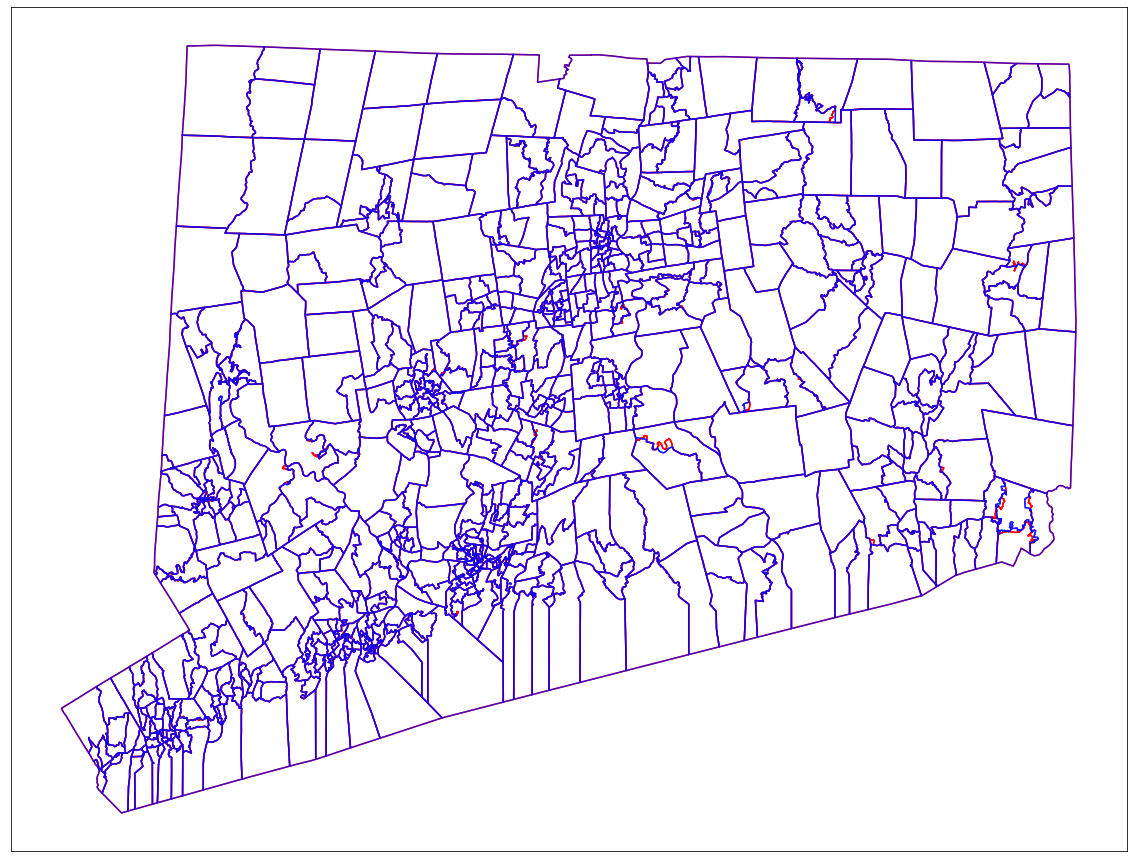

In [28]:
ax = ct_blocks_precinct_2.boundary.plot(figsize = (20,20), color = "red")

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ct_precincts.boundary.plot(ax = ax, color = "blue", alpha = .7)

## Using the compare geometries function to check maup outputs

Above we mentioned that it is important to check the maup outputs to make sure they are reasonable. The code below will do this for you one-by-one for the target geometries.

In [29]:
from matplotlib.lines import Line2D

def compare_geometries(gdf_1,gdf_2,left_gdf_name,right_gdf_name,join_col_name,area_threshold=.1):
    '''
    Function that joins to GeoDataFrames on a column and reports area differences row-by-row
    '''
    gdf_1 = gdf_1.to_crs(3857)
    gdf_2 = gdf_2.to_crs(3857)
    both = pd.merge(gdf_1,gdf_2,how="outer",on=join_col_name,validate="1:1",indicator=True)
    if(both["_merge"].str.contains("_")).any():
        print("Did not fully join")
        if(both["_merge"].str.contains("left_only")).any():
            print("Only left gdf:")
            print(both[both["_merge"]=="left_only"][join_col_name].values)
        if(both["_merge"].str.contains("right_only")).any():
            print("Only right gdf:")
            print(both[both["_merge"]=="right_only"][join_col_name].values)
    left_geoms = gp.GeoDataFrame(both,geometry="geometry_x")
    right_geoms = gp.GeoDataFrame(both,geometry="geometry_y")
    left_geoms["geometry_x"]=left_geoms.buffer(0)
    right_geoms["geometry_y"]=right_geoms.buffer(0)
    if (left_geoms.is_valid==False).any():
        print("Invalid geoms in left gdf")
    elif(right_geoms.is_valid==False).any():
        print("Invalid geoms in right gdf")
    count = 0
    area_list = []
    print("Checking " + str(both.shape[0])+" precincts for differences of greater than "+str(area_threshold)+" km^2")
    print()
    for index,row in both.iterrows():
        diff = left_geoms.iloc[[index]].symmetric_difference(right_geoms.iloc[[index]])
        intersection = left_geoms.iloc[[index]].intersection(right_geoms.iloc[[index]])
        area = float(diff.area/10e6)
        area_list.append(area)
        if (area > area_threshold):
            count += 1
            name = left_geoms.at[index,join_col_name]
            print(str(count)+") For " + name + " difference in area is " + str(area))
            if (intersection.iloc[0].is_empty):
                base = left_geoms.iloc[[index]].plot(color="orange",figsize=(10,10))
                right_geoms.iloc[[index]].plot(color="blue",ax=base)
                base.set_title(name)
                custom_lines = [Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='blue', lw=4)]
                base.legend(custom_lines, ['Overlap', left_gdf_name,right_gdf_name])
            else:
                base = left_geoms.iloc[[index]].plot(color="orange",figsize=(10,10))
                right_geoms.iloc[[index]].plot(color="blue",ax=base)
                intersection.plot(color="green",ax=base)
                base.set_title(name)
                custom_lines = [Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='blue', lw=4)]
                base.legend(custom_lines, ['Overlap', left_gdf_name,right_gdf_name])
                
                
    df = pd.DataFrame(area_list)
    print()
    print("Scroll down to see plots of any differences")
    print()
    print("Of the "+ str(both.shape[0])+" precincts:")
    print()
    print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
    print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and .1 km^2")
    print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between .1 and .5 km^2")
    print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between .5 and 1 km^2")
    print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
    print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
    print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")

In [30]:
ct_blocks_precinct_2.reset_index(inplace = True, drop = False)

In [31]:
ct_blocks_precinct_2.rename(columns = {'precinct_assignment_2':"Precinct_Name"}, inplace = True)

ct_precincts["Precinct_Name"] = ct_precincts["NAME20"]

Did not fully join
Only left gdf:
['East Haven 001-03' 'East Haven 005-03']
Invalid geoms in right gdf
Checking 741 precincts for differences of greater than 0.1 km^2

1) For Haddam 001-00 difference in area is 0.5529706508702167
2) For Haddam 002-00 difference in area is 0.5529706508702166
3) For Colchester 004-00 difference in area is 0.20872073559360194
4) For Colchester 002-00 difference in area is 0.20884757931799447
5) For Stafford 001-00 difference in area is 0.20303250230424527
6) For Stafford 002-00 difference in area is 0.20303250229912156
7) For Stonington 001-00 difference in area is 0.5723745146605234
8) For Stonington 005-00 difference in area is 0.38285013814152064
9) For Southbury 002-00 difference in area is 0.10802991322753613
10) For Stonington 003-00 difference in area is 0.9780657775597204
11) For Stonington 002-00 difference in area is 0.4635259830625924

Scroll down to see plots of any differences

Of the 741 precincts:

542 precincts w/ a difference of 0 km^2
18

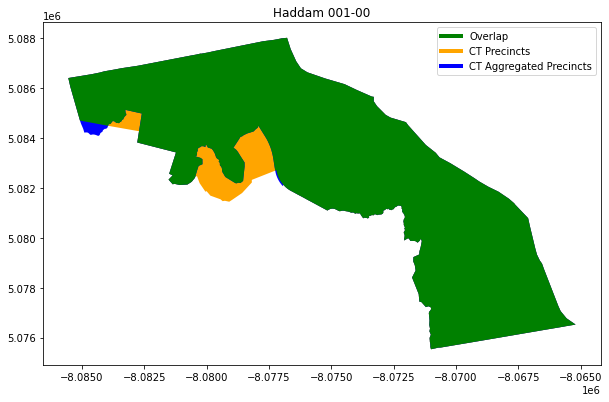

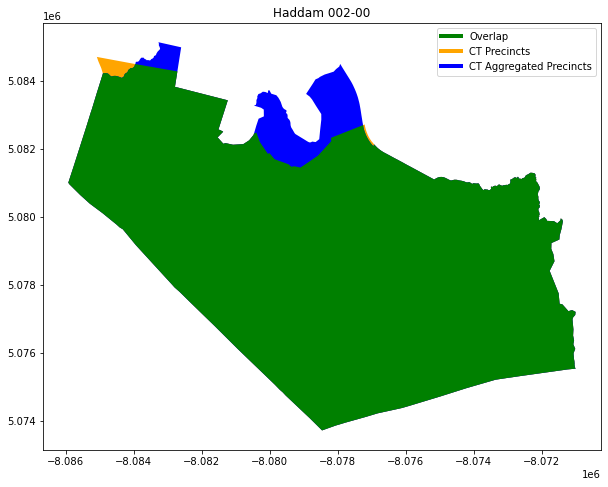

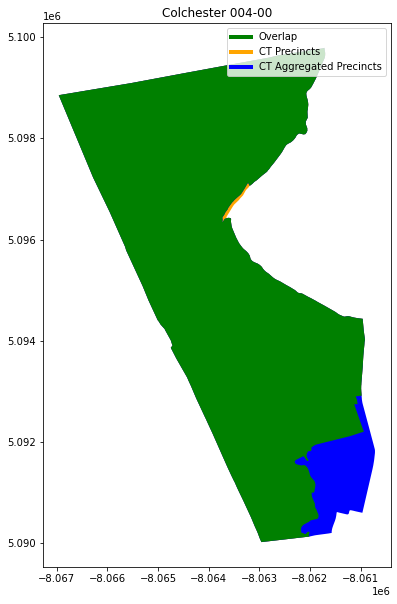

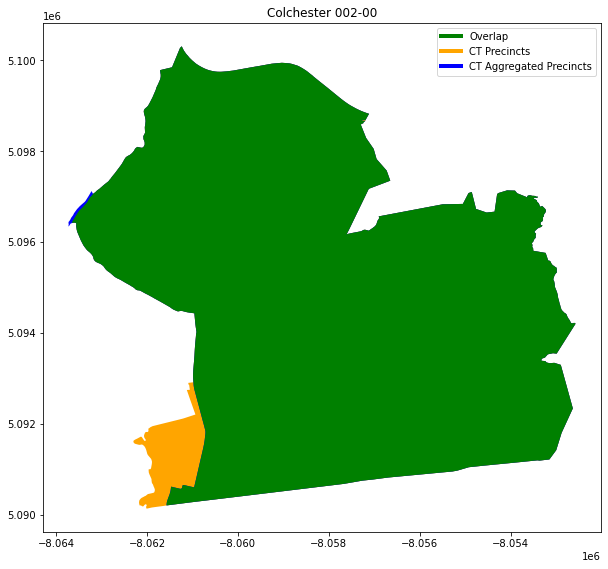

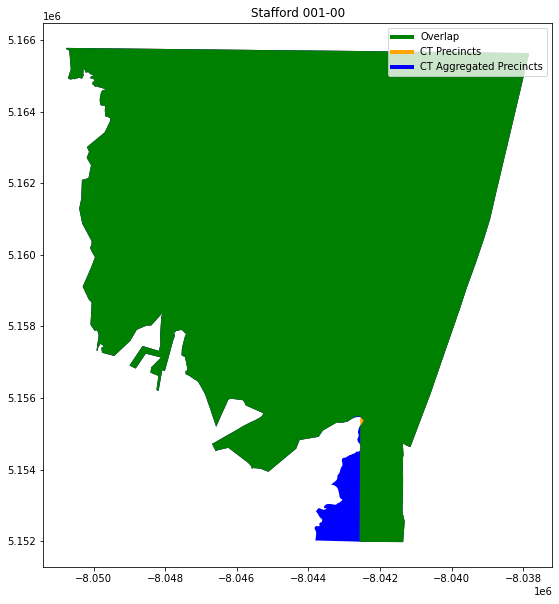

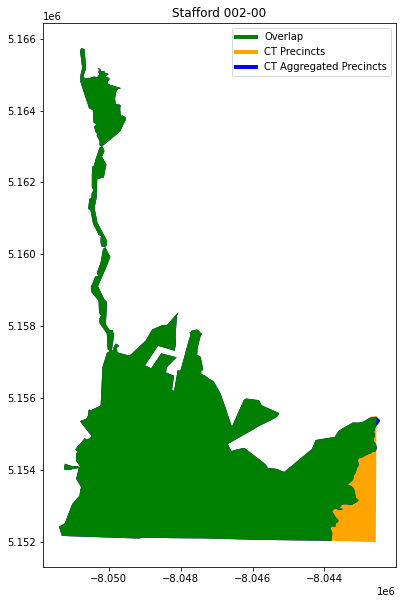

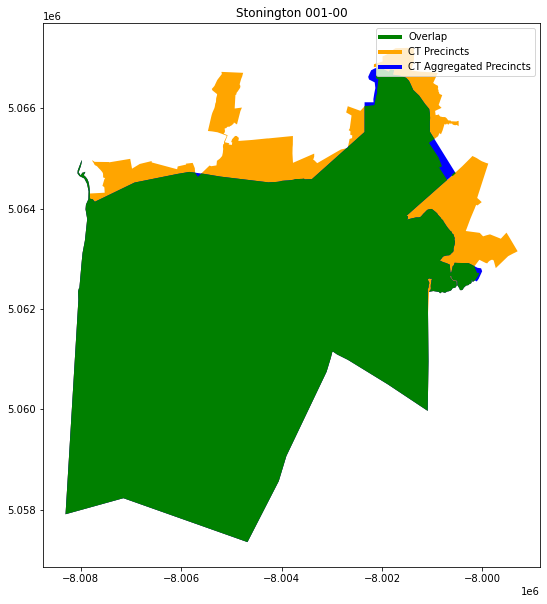

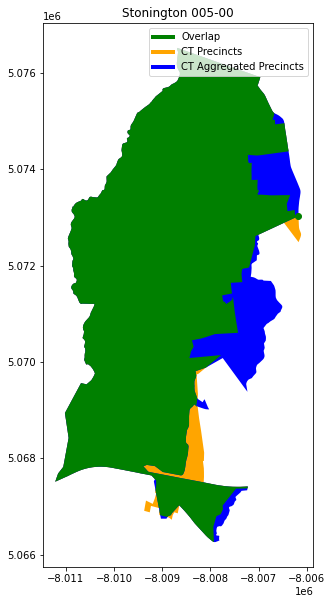

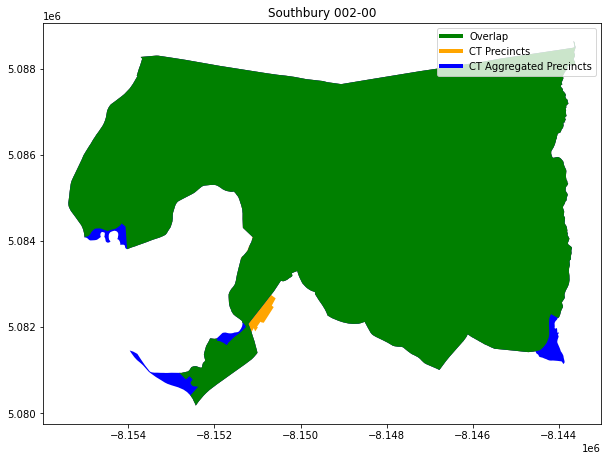

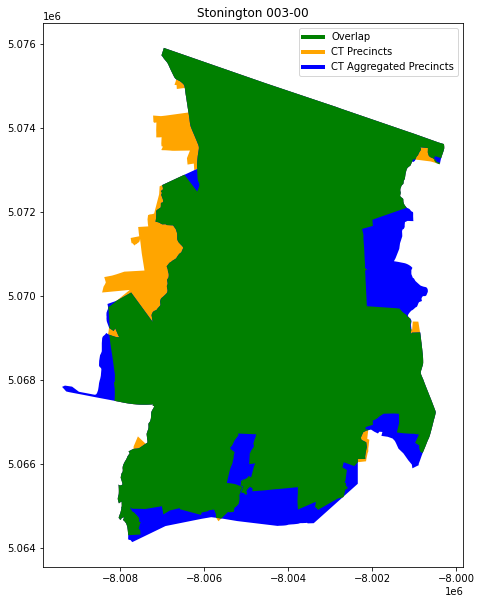

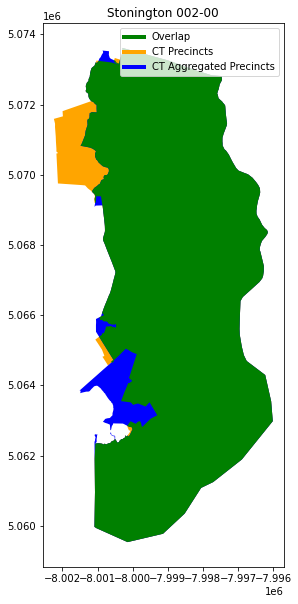

In [32]:
compare_geometries(ct_precincts, ct_blocks_precinct_2, "CT Precincts", "CT Aggregated Precincts", "Precinct_Name")

## Overlapping target geometries

One problem you may encounter with maup occurs when aggregating your source geometries to overlapping target geometries that contain the same largest area of a source geometry. This would mean the data should be mapped to two different places, which would introduce new (incorrect) data, which you don't want! To avoid this, maup gives you an error.

Below is an example of this error, which we have created by duplicating the CT precinct data and trying to aggregate to it.

In [33]:
ct_precincts_dup_data = gp.GeoDataFrame(pd.concat([ct_precincts, ct_precincts]))

In [34]:
try:
    maup.assign(ct_blocks, ct_precincts_dup_data)
except ValueError:
    print("We are expecting a value error here b/c our precinct data is duplicated")

We are expecting a value error here b/c our precinct data is duplicated


## When the source data has no overlaps

In some cases, the source data will not overlap with target data. In these cases, the maup output will be an "N/A" value for that index.

In [35]:
# To show this we are going to filter down the precinct data to just one precinct
# and try to aggregate all the census blocks to that one precinct.
ct_precincts_filtered = ct_precincts[ct_precincts["NAME20"]=="Montville 004-00"]

<AxesSubplot:>

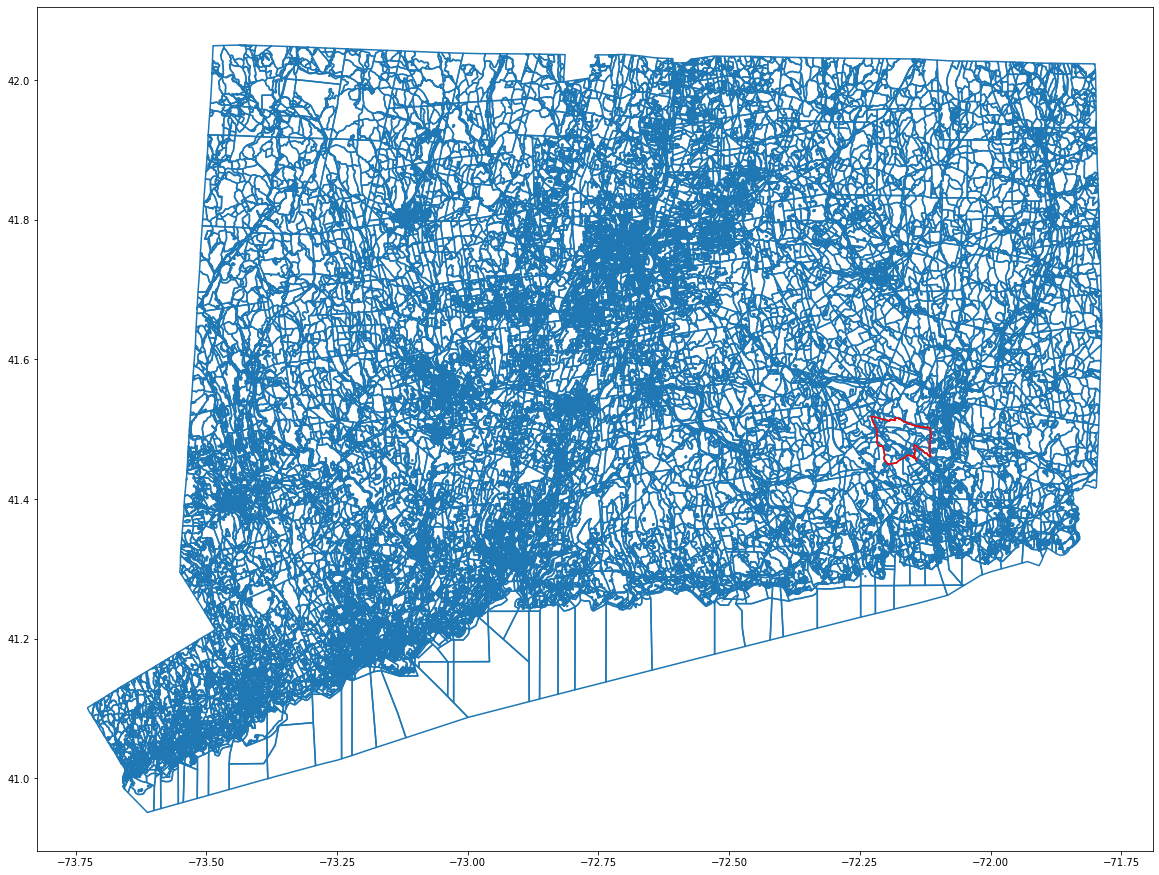

In [36]:
ax = ct_blocks.boundary.plot(figsize = (20,20))
ct_precincts_filtered.boundary.plot(ax = ax, color = "red")

In [37]:
# Run maup on the above example
fewer_overlaps_maup = maup.assign(ct_blocks, ct_precincts_filtered)

/Users/peterhorton/opt/anaconda3/envs/maup_new/lib/python3.9/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/Users/peterhorton/opt/anaconda3/envs/maup_new/lib/python3.9/site-packages/maup/intersections.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geometries = geometries[geometries.area > area_cut

In [38]:
# As you would expect, there are a lot of NaN values, because there are no target geometries that
# most of the census geographies should map to.
print(fewer_overlaps_maup)

GEOID20
090116936002019   NaN
090117024001008   NaN
090117054003006   NaN
090118707042013   NaN
090116933002017   NaN
                   ..
090034661021014   NaN
090034761003022   NaN
090034871004020   NaN
090034871002006   NaN
090034055002011   NaN
Length: 49926, dtype: float64


In [39]:
# But there are also some real values, as some blocks do map to the one precinct.
fewer_overlaps_maup[~fewer_overlaps_maup.isna()]

GEOID20
090116952023010    0.0
090116952022008    0.0
090116952022012    0.0
090116952021014    0.0
090116952023002    0.0
                  ... 
090116952011015    0.0
090116952011002    0.0
090116952021005    0.0
090116952021023    0.0
090116952011005    0.0
Length: 103, dtype: float64

## Final maup tips

- To make your aggregation as accurate as possible, filter down the source if you are able to.
    - This may not always make a difference, but it can, especially if you are using a georeferenced map, or a map that has been converted to a different crs. 
    - Spatial operations can be slightly imprecise due to where exactly boundaries are drawn, so it's best to avoid these by, if possible, filtering down your source data as much as possible.
- If you get the maup "cannot reindex from a duplicate axis" error above, try to pinpoint the error by running maup on difference pieces of the target geometry you are hoping to aggregate to